In [221]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,classification_report, auc, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve, precision_score, accuracy_score

## Explorations 

In [222]:
#Reading the dataset 
df_f = pd.read_csv("data/training_set_features.csv")
df_f

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [281]:
# Get a list of column names with dtype 'object'
cat_columns = df_f.select_dtypes(include=['object']).columns.tolist()
num_columns = df_f.select_dtypes(exclude=['object']).columns.tolist()
df_f_cat = df_f[cat_columns]
df_f_num = df_f[num_columns]

In [288]:
df_f_num.corr()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.003149,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726
h1n1_concern,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525
h1n1_knowledge,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583
behavioral_antiviral_meds,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822
behavioral_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328
behavioral_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826
behavioral_wash_hands,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764
behavioral_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449
behavioral_outside_home,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558
behavioral_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606


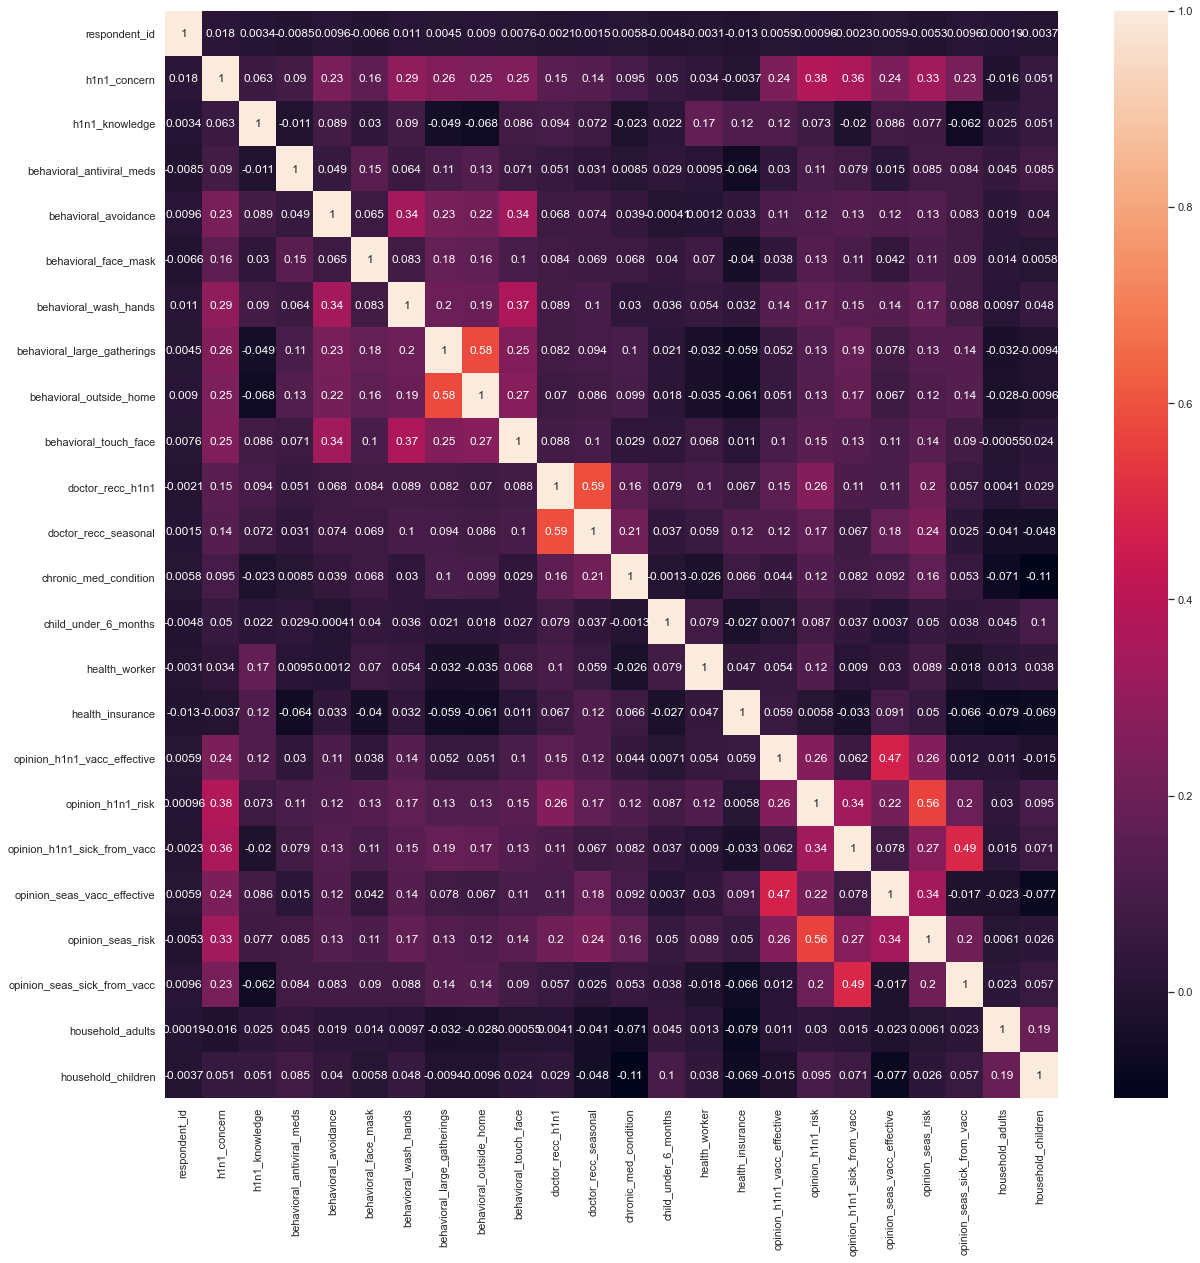

In [289]:
#correlation visualisation for 


sns.set(rc={'figure.figsize':(20, 20)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(df_f_num.corr(), annot=True);

In [225]:
#Exploring the target database
df_t = pd.read_csv("data/training_set_labels.csv")
df_t['h1n1_vaccine']

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

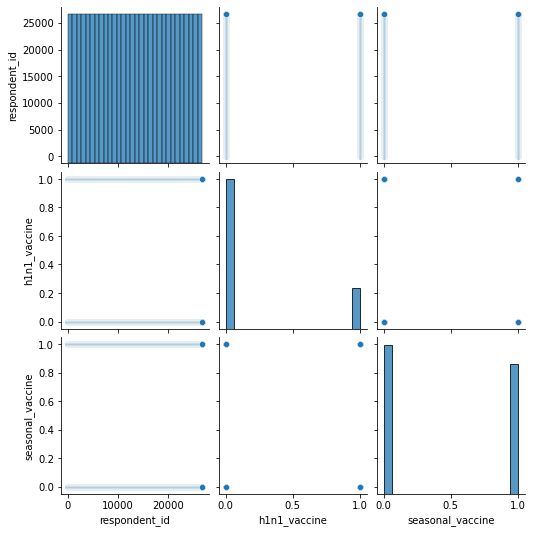

In [278]:
sns.pairplot(df_t)

# EDA Summary

In this stage, we initiate a feature selection procedure by randomly selecting features for incorporation into our predictive model. For efficient handling of categorical variables, we employ the OneHotEncoder, a methodology proficient in converting categorical data into a format conducive to analysis. Furthermore, we execute data scaling, centering it around the mean to guarantee uniformity. Addressing imbalances within our dataset, we deploy the Synthetic Minority Over-sampling Technique (SMOTE) to resample the data, augmenting the representation of minority classes and fortifying the model's robustness. Additionally, in an effort to manage missing values, we adopt a strategy of dropping related columns.

In [226]:
# features selection
col_n_na= ['age_group','race','sex','hhs_geo_region','census_msa']

In [227]:
#creating X1 dataframe
X1 = df_f_cat[col_n_na]
X1

,age_group,race,sex,hhs_geo_region,census_msa
0,55 - 64 Years,White,Female,oxchjgsf,Non-MSA
1,35 - 44 Years,White,Male,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,White,Male,qufhixun,"MSA, Not Principle City"
3,65+ Years,White,Female,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,White,Female,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...
26702,65+ Years,White,Female,qufhixun,Non-MSA
26703,18 - 34 Years,White,Male,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,White,Female,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Hispanic,Female,lrircsnp,Non-MSA


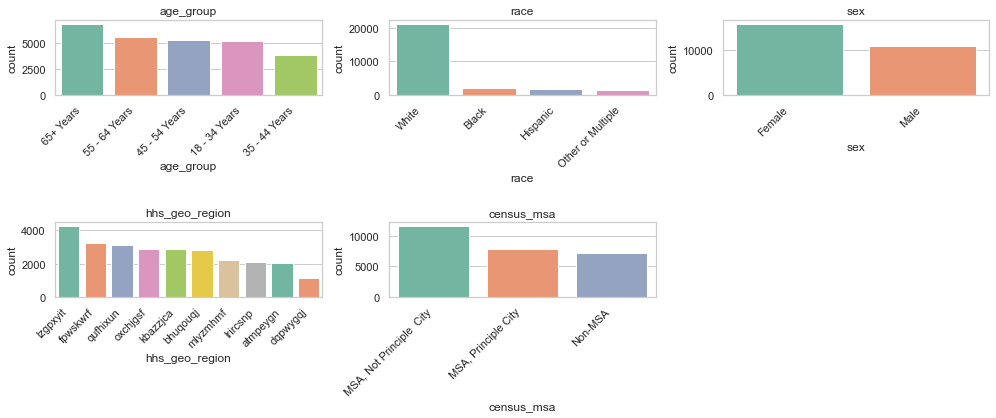

In [290]:
#visualization 
sns.set(style="whitegrid")

# Plotting X1
plt.figure(figsize=(14, 10))
for i, column in enumerate(X1):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=column, data=X1, palette="Set2", order= X1[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [228]:
# One-hot encode the categorical columns

#Instantiate the model 
ohe = OneHotEncoder()


X1_clean = ohe.fit_transform(X1).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
X1_ohe_df = pd.DataFrame(X1_clean, columns=ohe.get_feature_names(X1.columns))

X1_ohe_df.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [229]:
#merging with the target h1n1 vaccine
X_n = pd.concat([df_f[num_columns], df_t['h1n1_vaccine']], axis=1)

In [230]:
#Merging all together
X_c = pd.concat([X1_ohe_df, X_n], axis=1)
X_c.isna().sum()

age_group_18 - 34 Years                    0
age_group_35 - 44 Years                    0
age_group_45 - 54 Years                    0
age_group_55 - 64 Years                    0
age_group_65+ Years                        0
race_Black                                 0
race_Hispanic                              0
race_Other or Multiple                     0
race_White                                 0
sex_Female                                 0
sex_Male                                   0
hhs_geo_region_atmpeygn                    0
hhs_geo_region_bhuqouqj                    0
hhs_geo_region_dqpwygqj                    0
hhs_geo_region_fpwskwrf                    0
hhs_geo_region_kbazzjca                    0
hhs_geo_region_lrircsnp                    0
hhs_geo_region_lzgpxyit                    0
hhs_geo_region_mlyzmhmf                    0
hhs_geo_region_oxchjgsf                    0
hhs_geo_region_qufhixun                    0
census_msa_MSA, Not Principle  City        0
census_msa

In [231]:
#lets check the features highly correlated to our target
X_c.corr()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,...,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine
age_group_18 - 34 Years,1.000000,-0.202105,-0.243313,-0.252668,-0.289120,0.027414,0.123630,0.063551,-0.131630,-0.055495,...,-0.184425,-0.014708,0.027698,0.016915,-0.077216,-0.022405,0.037537,0.180557,0.202008,-0.027005
age_group_35 - 44 Years,-0.202105,1.000000,-0.202659,-0.210450,-0.240812,0.012561,0.054278,0.024060,-0.055878,-0.008218,...,-0.038001,-0.013392,0.044911,0.027925,-0.057703,-0.003092,0.027391,0.043901,0.374839,-0.014733
age_group_45 - 54 Years,-0.243313,-0.202659,1.000000,-0.253360,-0.289912,0.002652,-0.011495,-0.003627,0.007415,0.007257,...,-0.017152,0.004651,0.004947,0.016475,-0.038212,-0.018482,0.016108,0.065041,0.036191,-0.021401
age_group_55 - 64 Years,-0.252668,-0.210450,-0.253360,1.000000,-0.301058,-0.008590,-0.055283,-0.026241,0.055123,-0.006605,...,0.028715,0.019189,-0.006915,-0.010897,0.031172,0.018572,-0.008543,-0.036054,-0.221260,0.038122
age_group_65+ Years,-0.289120,-0.240812,-0.289912,-0.301058,1.000000,-0.029420,-0.094043,-0.049354,0.106455,0.056546,...,0.183171,0.001986,-0.059272,-0.042616,0.122126,0.022328,-0.062716,-0.223004,-0.307980,0.020377
race_Black,0.027414,0.012561,0.002652,-0.008590,-0.029420,1.000000,-0.077836,-0.074384,-0.577294,0.027758,...,-0.049174,-0.031554,-0.004149,0.054422,-0.046673,-0.035894,0.069845,-0.033967,0.025990,-0.045725
race_Hispanic,0.123630,0.054278,-0.011495,-0.055283,-0.094043,-0.077836,1.000000,-0.067216,-0.521664,-0.017255,...,-0.180440,-0.010816,0.087256,0.091554,-0.022163,0.045119,0.117005,0.093778,0.157674,-0.002902
race_Other or Multiple,0.063551,0.024060,-0.003627,-0.026241,-0.049354,-0.074384,-0.067216,1.000000,-0.498533,-0.029186,...,-0.026516,-0.024795,0.016132,0.042645,-0.041791,-0.004496,0.034356,0.041259,0.023133,0.002508
race_White,-0.131630,-0.055878,0.007415,0.055123,0.106455,-0.577294,-0.521664,-0.498533,1.000000,0.009222,...,0.157578,0.042319,-0.060378,-0.117768,0.069384,-0.001160,-0.138940,-0.059339,-0.128062,0.030887
sex_Female,-0.055495,-0.008218,0.007257,-0.006605,0.056546,0.027758,-0.017255,-0.029186,0.009222,1.000000,...,0.065238,0.017144,0.093023,0.090731,0.051251,0.091096,0.042407,-0.064799,0.028112,0.020672


In [232]:
#dropping the missing values 
X_cm= X_c.dropna()
X_cm.isna().sum()

age_group_18 - 34 Years                0
age_group_35 - 44 Years                0
age_group_45 - 54 Years                0
age_group_55 - 64 Years                0
age_group_65+ Years                    0
race_Black                             0
race_Hispanic                          0
race_Other or Multiple                 0
race_White                             0
sex_Female                             0
sex_Male                               0
hhs_geo_region_atmpeygn                0
hhs_geo_region_bhuqouqj                0
hhs_geo_region_dqpwygqj                0
hhs_geo_region_fpwskwrf                0
hhs_geo_region_kbazzjca                0
hhs_geo_region_lrircsnp                0
hhs_geo_region_lzgpxyit                0
hhs_geo_region_mlyzmhmf                0
hhs_geo_region_oxchjgsf                0
hhs_geo_region_qufhixun                0
census_msa_MSA, Not Principle  City    0
census_msa_MSA, Principle City         0
census_msa_Non-MSA                     0
respondent_id   

In [233]:
#Sanity check
X_cm.shape

(13506, 49)

In [234]:
#determine X_sm and y_sm 
X_sm= X_cm.drop('h1n1_vaccine', axis =1)
y_sm =X_cm['h1n1_vaccine']

In [235]:
# Performing the split test
X_tr_samp, X_te_samp, y_tr_samp, y_te_samp = train_test_split(
    X_sm, y_sm,random_state=42)

In [236]:
#Sanity check
y_sm.value_counts()

0    9475
1    4031
Name: h1n1_vaccine, dtype: int64

In [237]:
#Scaling the the data
scaler = StandardScaler()
scaler.fit(X_tr_samp)
X_tr_sc = scaler.transform(X_tr_samp)
X_te_sc = scaler.transform(X_te_samp)

In [238]:
from imblearn.over_sampling import SMOTE
# Instantiate our SMOTE
sm = SMOTE(random_state=42)
# Fit and resample on the training data! X_tr_samp, y_tr_samp
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr_sc, y_tr_samp)

In [239]:
#sanity check 
y_tr_smote.value_counts()

1    7069
0    7069
Name: h1n1_vaccine, dtype: int64

# ---- Dummy model

In [240]:
#Instantiate our model
dummy_model = DummyClassifier(strategy='most_frequent')
#fitting the data to the model 
dummy_model.fit(X_tr_smote, y_tr_smote)
#model prediction 
dummy_model.predict(X_tr_smote)
#Accuracy score
print ('This is the accuracy score:', dummy_model.score(X_tr_smote,  y_tr_smote))

This is the accuracy score: 0.5


In [241]:
class mcalculation():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.precision_results = None  # New attribute for precision
        self.precision_mean = None
        self.precision_median = None
        self.precision_std = None
        #
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.

        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''

        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Precision scores
        y_pred = cross_val_predict(self.model, cv_X, cv_y, cv=kfolds)
        self.precision_results = [precision_score(cv_y, y_pred)]
        self.precision_mean = np.mean(self.precision_results)
        self.precision_median = np.median(self.precision_results)
        self.precision_std = np.std(self.precision_results)

    def print_cv_summary(self):
        cv_summary = (
            f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
            {self.precision_mean:.5f} ± {self.precision_std:.5f} precision
        ''')
        print(cv_summary)

    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
            y=self.cv_results,
            color='orange',
            size=10,
            alpha=0.8,
            ax=ax
        )

        return ax

In [242]:
# Accuracy, Precision metric calculation
rf_clf_sm_model_results = mcalculation(
                        model=dummy_model,
                        model_name='Dummy Model ',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm_model_results.print_cv_summary()

CV Results for `Dummy Model ` model:
            0.49993 ± 0.00014 accuracy
            0.49965 ± 0.00000 precision
        


In [243]:
#Defining the evaluate model performance fonction
def evaluate_model_performance(model, X_train_scaled, y_train):
  
    # Calculate roc-auc for train set
    train_probs = model.predict_proba(X_train_scaled)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

  

    # Plot ROC curve for train set
    plt.subplot(1, 2, 2)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train Set')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

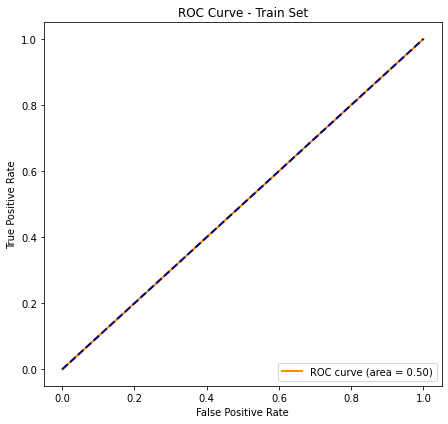

In [244]:
#Model performance evaluation
evaluate_model_performance(dummy_model, X_tr_smote, y_tr_smote)

In [245]:
#dummy model cross validation 
cv_results = cross_val_score(dummy_model,X_tr_smote,y_tr_smote, cv=5)
cv_results.mean()

0.4999292536257517

# ---- Decision Tree Model 1

In [246]:
#instantiation 
rf_clf_sm = DecisionTreeClassifier(random_state=42)
#fitting the model 
rf_clf_sm.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(random_state=42)

In [247]:
class mcalculation():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.precision_results = None  # New attribute for precision
        self.precision_mean = None
        self.precision_median = None
        self.precision_std = None
        #
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Precision scores
        y_pred = cross_val_predict(self.model, cv_X, cv_y, cv=kfolds)
        self.precision_results = [precision_score(cv_y, y_pred)]
        self.precision_mean = np.mean(self.precision_results)
        self.precision_median = np.median(self.precision_results)
        self.precision_std = np.std(self.precision_results)

    def print_cv_summary(self):
        cv_summary = (
            f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
            {self.precision_mean:.5f} ± {self.precision_std:.5f} precision
        ''')
        print(cv_summary)

    def plot_cv(self, ax):
    
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
            y=self.cv_results,
            color='orange',
            size=10,
            alpha=0.8,
            ax=ax
        )

        return ax

In [248]:
# Accuracy, Precision metric calculation
rf_clf_sm_model_results = mcalculation(
                        model=rf_clf_sm ,
                        model_name='Decision Tree',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm_model_results.print_cv_summary()

CV Results for `Decision Tree` model:
            0.79623 ± 0.09573 accuracy
            0.79635 ± 0.00000 precision
        


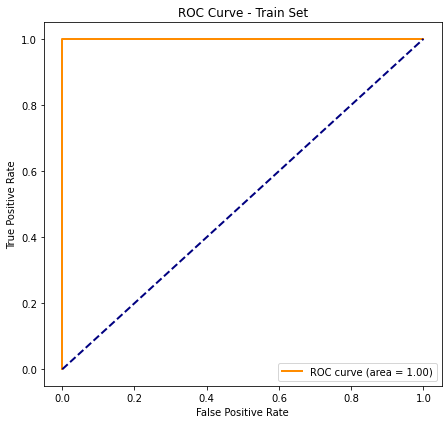

In [249]:
#model performance evaluation
evaluate_model_performance(rf_clf_sm, X_tr_smote, y_tr_smote)

In [250]:
#cross validation score
cv_results = cross_val_score(rf_clf_sm, X_tr_smote, y_tr_smote, cv=5)
cv_results.mean()

0.7892312410785269

In [251]:
#Using Grid search to look for the best parameters
param_grid = {
    'max_depth': [5, 10, 20],
}

rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 10}
Best cross-validated accuracy: 0.83


In [252]:
#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[8,10,12],
}

rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))



Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}
Best cross-validated accuracy: 0.83


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validated accuracy: 0.83

In [253]:
#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [7, 8, 9],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[9,10,11],
}

rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 9}
Best cross-validated accuracy: 0.83


In [254]:
#Using Grid search to look for the best parameters
param_grid = {
    'max_depth': [8],
    'min_samples_leaf': [2],
    'min_samples_split':[10,11, 12],
}

rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best cross-validated accuracy: 0.83


# ---- Decision Tree Model 2

In [255]:
#instantiation 
rf_clf_sm2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=11,random_state=42)
#fitting the model 
rf_clf_sm2.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=11,
                       random_state=42)

In [256]:
# Accuracy, Precision metric calculation
rf_clf_sm2_model_results = mcalculation(
                        model=rf_clf_sm2 ,
                        model_name='Decision Tree 2',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm2_model_results.print_cv_summary()

CV Results for `Decision Tree 2` model:
            0.83209 ± 0.07959 accuracy
            0.87893 ± 0.00000 precision
        


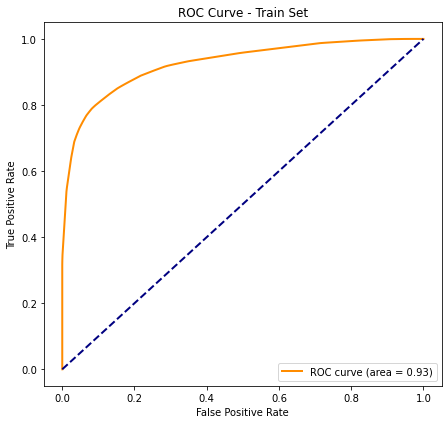

In [257]:
#model performance evaluation
evaluate_model_performance(rf_clf_sm2, X_tr_smote, y_tr_smote)

In [258]:
#cross validation score
cv_results2 = cross_val_score(rf_clf_sm2, X_tr_smote, y_tr_smote, cv=5)
cv_results2.mean()

0.8279907229188733

In [259]:
#Using Grid search to look for the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}
#instatiate r_model 
rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))



Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validated accuracy: 0.82


# ---- Decision Tree Model 3

In [260]:
#instantiation 
rf_clf_sm3 = DecisionTreeClassifier(max_depth=7,min_samples_leaf=4,min_samples_split=5,random_state=42)
#fitting the model 
rf_clf_sm3.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [261]:
# Accuracy, Precision metric calculation
rf_clf_sm3_model_results = mcalculation(
                        model=rf_clf_sm3 ,
                        model_name='Decision Tree 3',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm3_model_results.print_cv_summary()

CV Results for `Decision Tree 3` model:
            0.82417 ± 0.07288 accuracy
            0.86918 ± 0.00000 precision
        


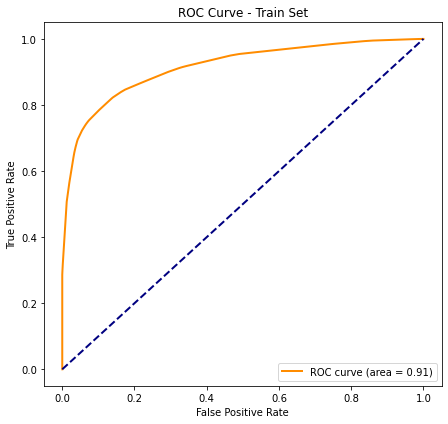

In [262]:
#model performance evaluation
evaluate_model_performance(rf_clf_sm3, X_tr_smote, y_tr_smote)

In [263]:
#cross validation score
cv_results3 = cross_val_score(rf_clf_sm3, X_tr_smote, y_tr_smote, cv=5)
cv_results3.mean()

0.8219784068456872

In [264]:
print('Model 1: ')
rf_clf_sm_model_results.print_cv_summary(), 
print('cross validation2:',cv_results.mean())
print('\n')
print('======================================')
print('Model 2: ')
rf_clf_sm2_model_results.print_cv_summary()
print('cross validation2:',cv_results2.mean())
print('\n')
print('======================================')
print('Model 3: ')
rf_clf_sm3_model_results.print_cv_summary()
print('cross validation3:',cv_results3.mean())


Model 1: 
CV Results for `Decision Tree` model:
            0.79623 ± 0.09573 accuracy
            0.79635 ± 0.00000 precision
        
cross validation2: 0.7892312410785269


Model 2: 
CV Results for `Decision Tree 2` model:
            0.83209 ± 0.07959 accuracy
            0.87893 ± 0.00000 precision
        
cross validation2: 0.8279907229188733


Model 3: 
CV Results for `Decision Tree 3` model:
            0.82417 ± 0.07288 accuracy
            0.86918 ± 0.00000 precision
        
cross validation3: 0.8219784068456872


# ----- Model 2 Evaluation on the test set

In [265]:
#Calculating the precision Score
precision_score(y_te_samp, rf_clf_sm2.predict(X_te_sc))

0.7007481296758105

In [266]:
#Calculating the accuracy Score
accuracy_score(y_te_samp, rf_clf_sm2.predict(X_te_sc))

0.8078175895765473

In [267]:
def evaluate_model_performance(model, X_train_scaled, y_train):
    #X_test_scaled, y_test
    # Calculate roc-auc for test set
    #test_probs = model.predict_proba(X_test_scaled)[:, 1]
   # fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probs)
   # roc_auc_test = auc(fpr_test, tpr_test)

    # Print AUC for the test set
   # print('\nAUC for Test Set is: {:.2f}'.format(roc_auc_test))

    # Calculate roc-auc for train set
    train_probs = model.predict_proba(X_train_scaled)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Print AUC for the train set
    #print('\nAUC for Train Set is: {:.2f}'.format(roc_auc_train))

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

    # Plot ROC curve for test set
   # plt.subplot(1, 2, 1)
    #plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
   # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   # plt.xlabel('False Positive Rate')
   # plt.ylabel('True Positive Rate')
   # plt.title('ROC Curve - Test Set')
    #plt.legend(loc='lower right')

    # Plot ROC curve for train set
    plt.subplot(1, 2, 2)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train Set')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # Create and print a confusion matrix
   # print('\nConfusion Matrix')
  #  print('----------------')
    #y_pred = model.predict(X_test_scaled)
   # confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
  #  print(confusion_matrix)

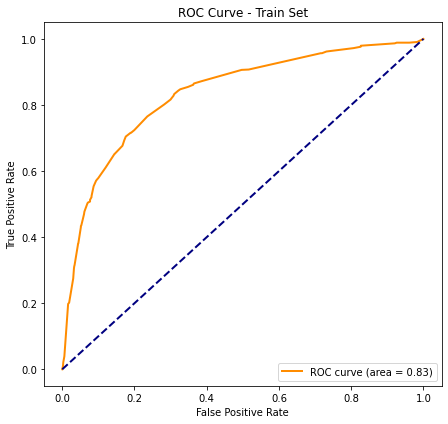

In [268]:
#model performance evaluation
evaluate_model_performance( rf_clf_sm2, X_te_sc, y_te_samp)

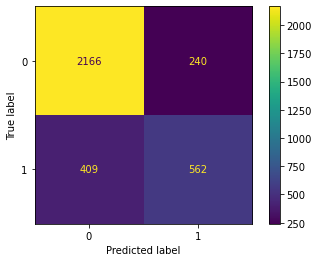

In [269]:
ConfusionMatrixDisplay(confusion_matrix(y_te_samp, rf_clf_sm2.predict(X_te_sc))).plot();

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [271]:
feature_importances= rf_clf_sm2.feature_importances_

In [272]:
X_tr_smote

array([[-0.49462582, -0.40131033, -0.49431659, ..., -0.06026364,
         1.42026955, -0.556422  ],
       [ 2.02173027, -0.40131033, -0.49431659, ..., -0.82232408,
        -1.16387097, -0.556422  ],
       [-0.49462582,  2.49183721, -0.49431659, ...,  1.46385723,
         0.12819929, -0.556422  ],
       ...,
       [-0.49462582,  2.49183721, -0.49431659, ...,  1.46385723,
         0.67116411,  2.75367887],
       [-0.49462582, -0.40131033, -0.49431659, ..., -0.82232408,
         0.82619795, -0.556422  ],
       [-0.49462582, -0.40131033, -0.49431659, ..., -0.78397496,
         0.06317853, -0.556422  ]])

In [273]:
#feature_importance_dict = dict(zip(X_tr_smote.columns, feature_importances))


In [274]:
data= X_sm
data.corr()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
age_group_18 - 34 Years,1.000000,-0.197280,-0.244850,-0.258037,-0.290092,0.017819,0.129127,0.066571,-0.129231,-0.060616,...,0.025917,-0.183474,-0.013108,0.020768,0.016497,-0.074593,-0.025974,0.034388,0.195026,0.194887
age_group_35 - 44 Years,-0.197280,1.000000,-0.197234,-0.207857,-0.233678,0.020794,0.051216,0.003794,-0.047220,-0.009780,...,0.024227,-0.036864,-0.005898,0.036261,0.032107,-0.053242,-0.008853,0.034629,0.028164,0.361452
age_group_45 - 54 Years,-0.244850,-0.197234,1.000000,-0.257977,-0.290024,0.007566,-0.015944,0.008266,-0.000337,0.005708,...,0.032470,-0.016505,-0.001992,-0.001748,0.020267,-0.044469,-0.008999,0.011325,0.071002,0.040425
age_group_55 - 64 Years,-0.258037,-0.207857,-0.257977,1.000000,-0.305644,-0.022945,-0.052315,-0.022342,0.060250,-0.001505,...,0.038912,0.032726,0.023255,0.004316,-0.003204,0.039557,0.025985,-0.004689,-0.041026,-0.218747
age_group_65+ Years,-0.290092,-0.233678,-0.290024,-0.305644,1.000000,-0.017964,-0.094354,-0.050186,0.098674,0.059157,...,-0.108863,0.180528,-0.003443,-0.049976,-0.055800,0.113288,0.014428,-0.064548,-0.226045,-0.293839
race_Black,0.017819,0.020794,0.007566,-0.022945,-0.017964,1.000000,-0.076230,-0.073950,-0.585538,0.020885,...,-0.002871,-0.052913,-0.042774,-0.003961,0.065554,-0.057190,-0.042442,0.079974,-0.038686,0.028889
race_Hispanic,0.129127,0.051216,-0.015944,-0.052315,-0.094354,-0.076230,1.000000,-0.064990,-0.514591,-0.018055,...,-0.028429,-0.180724,-0.012210,0.080983,0.089406,-0.015763,0.030088,0.106119,0.104358,0.136132
race_Other or Multiple,0.066571,0.003794,0.008266,-0.022342,-0.050186,-0.073950,-0.064990,1.000000,-0.499201,-0.029986,...,-0.013040,-0.025464,-0.016680,0.009129,0.038411,-0.029405,-0.005817,0.030036,0.046459,0.016037
race_White,-0.129231,-0.047220,-0.000337,0.060250,0.098674,-0.585538,-0.514591,-0.499201,1.000000,0.014454,...,0.026791,0.159916,0.046070,-0.051635,-0.120885,0.065438,0.013894,-0.135792,-0.064282,-0.111204
sex_Female,-0.060616,-0.009780,0.005708,-0.001505,0.059157,0.020885,-0.018055,-0.029986,0.014454,1.000000,...,0.113346,0.063702,0.026500,0.088227,0.091361,0.056747,0.091311,0.042991,-0.063607,0.035745


In [275]:
# Pair feature importances with corresponding column names
if isinstance(X_c, np.ndarray):
    # If X_tr_smote is a NumPy array, use generic feature names
    feature_names = [f'feature_{i}' for i in range(X_c.shape[1])]
else:
    # If X_tr_smote is a DataFrame, use its column names
    feature_names = X_c.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
print("Sorted Feature Importances:")

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Sorted Feature Importances:
doctor_recc_h1n1: 0.3980680936071827
opinion_h1n1_vacc_effective: 0.25246855544618696
opinion_h1n1_risk: 0.1148107327723949
opinion_seas_risk: 0.10740556615611911
h1n1_knowledge: 0.02227761984460041
health_worker: 0.02124945390068658
race_White: 0.01809572626715784
doctor_recc_seasonal: 0.011082624130527113
opinion_seas_vacc_effective: 0.00935054005945494
respondent_id: 0.009108802188008434
health_insurance: 0.008618931476780908
h1n1_concern: 0.0038798917206360256
chronic_med_condition: 0.0034056198670053195
household_adults: 0.003142802183471779
household_children: 0.0026673107601932217
opinion_seas_sick_from_vacc: 0.00242508721945389
age_group_18 - 34 Years: 0.0019291861172836
census_msa_MSA, Not Principle  City: 0.0018141588542154416
age_group_65+ Years: 0.0017523226808550767
age_group_45 - 54 Years: 0.0017451972863770262
behavioral_avoidance: 0.001466469317513998
sex_Male: 0.0008342709618745959
hhs_geo_region_lzgpxyit: 0.0006291442194956013
opinion_h1n1_

In [276]:
sorted_feature_importance

[('doctor_recc_h1n1', 0.3980680936071827),
 ('opinion_h1n1_vacc_effective', 0.25246855544618696),
 ('opinion_h1n1_risk', 0.1148107327723949),
 ('opinion_seas_risk', 0.10740556615611911),
 ('h1n1_knowledge', 0.02227761984460041),
 ('health_worker', 0.02124945390068658),
 ('race_White', 0.01809572626715784),
 ('doctor_recc_seasonal', 0.011082624130527113),
 ('opinion_seas_vacc_effective', 0.00935054005945494),
 ('respondent_id', 0.009108802188008434),
 ('health_insurance', 0.008618931476780908),
 ('h1n1_concern', 0.0038798917206360256),
 ('chronic_med_condition', 0.0034056198670053195),
 ('household_adults', 0.003142802183471779),
 ('household_children', 0.0026673107601932217),
 ('opinion_seas_sick_from_vacc', 0.00242508721945389),
 ('age_group_18 - 34 Years', 0.0019291861172836),
 ('census_msa_MSA, Not Principle  City', 0.0018141588542154416),
 ('age_group_65+ Years', 0.0017523226808550767),
 ('age_group_45 - 54 Years', 0.0017451972863770262),
 ('behavioral_avoidance', 0.001466469317513

In [277]:
# Assuming X_c is your feature matrix
# You might need to replace this with your actual data
# Calculate correlation matrix
correlation_matrix = np.corrcoef(X_c, rowvar=False)

# Find features with correlation 0
zero_correlation_features = [feature for feature, correlation in zip(feature_names, correlation_matrix.mean(axis=1)) if correlation == 0]

# Display features with correlation 0
print("Features with Correlation 0:")
print(zero_correlation_features)

Features with Correlation 0:
[]
